In [442]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [443]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [444]:
#Shape of the Data
print('****Shape of the train data****')
print('*************************')
print('No of rows\t:\t{}\nNo of columns\t:\t{}'.format(df_train.shape[0],df_train.shape[1]))

#Shape of the Data
print('\n****Shape of the test data****')
print('*************************')
print('No of rows\t:\t{}\nNo of columns\t:\t{}'.format(df_test.shape[0],df_test.shape[1]))

****Shape of the train data****
*************************
No of rows	:	550068
No of columns	:	12

****Shape of the test data****
*************************
No of rows	:	233599
No of columns	:	11


In [445]:
print('****Show infomation of the train data****')
print('***********************************')
df_train.info()

****Show infomation of the train data****
***********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  

In [446]:
print('****Show infomation of the test data****')
print('***********************************')
df_test.info()

****Show infomation of the test data****
***********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6

In [447]:
#Check for missing value
print('****Missing Values in the Dataset****')
print('*************************************')
msv = df_train.isnull().sum()[df_train.isnull().sum()>0]
if msv.empty:
    print('There is no missing values in the data.') 
else:
    for i in range(msv.count()):
        print('{} Missing values in {} which is {}% of total data'.format(msv[i],msv.index[i],round(((msv[i]/df_train.shape[0])*100),2)))

****Missing Values in the Dataset****
*************************************
173638 Missing values in Product_Category_2 which is 31.57% of total data
383247 Missing values in Product_Category_3 which is 69.67% of total data


In [448]:
#Check for missing value
print('****Missing Values in the Dataset****')
print('*************************************')
msv = df_test.isnull().sum()[df_test.isnull().sum()>0]
if msv.empty:
    print('There is no missing values in the data.') 
else:
    for i in range(msv.count()):
        print('{} Missing values in {} which is {}% of total data'.format(msv[i],msv.index[i],round(((msv[i]/df_test.shape[0])*100),2)))

****Missing Values in the Dataset****
*************************************
72344 Missing values in Product_Category_2 which is 30.97% of total data
162562 Missing values in Product_Category_3 which is 69.59% of total data


In [449]:
#Check for duplicate values
print('****Duplicates data in the train dataset without EmployeeID Column****')
print('**********************************************************************')

dups = df_train.loc[:, ~df_train.columns. isin(['EmployeeID'])].duplicated().sum()
if dups ==0:
    print('There is no duplicate values in the data.') 
else:
    print('There are {} duplicates in the data which is {}% of total data'.format(dups,round((dups/df_train.shape[0])*100,2)))

****Duplicates data in the train dataset without EmployeeID Column****
**********************************************************************
There is no duplicate values in the data.


In [450]:
# df_train['Occupation']=df_train['Occupation'].astype("category")
# df_train['Marital_Status']=df_train['Marital_Status'].astype("category")
# df_train['Product_Category_1']=df_train['Product_Category_1'].astype("category")
# df_train['Product_Category_2']=df_train['Product_Category_2'].astype("category")
# df_train['Product_Category_3']=df_train['Product_Category_3'].astype("category")

# df_test['Occupation']=df_test['Occupation'].astype("category")
# df_test['Marital_Status']=df_test['Marital_Status'].astype("category")
# df_test['Product_Category_1']=df_test['Product_Category_1'].astype("category")
# df_test['Product_Category_2']=df_test['Product_Category_2'].astype("category")
# df_test['Product_Category_3']=df_test['Product_Category_3'].astype("category")

In [451]:
print('****Describe the data - Continues Variables****')
print('***********************************************')
df_train.loc[:, ~df_train.columns. isin(['User_ID'])].describe().T

****Describe the data - Continues Variables****
***********************************************


,count,mean,std,min,25%,50%,75%,max
Occupation,550068.0,8.076707,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,0.409653,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,12.668243,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [452]:
print('****Describe the data - Catagorical Variables****')
print('*************************************************')
print(df_train.describe(include='object').T)

****Describe the data - Catagorical Variables****
*************************************************
                             count unique        top    freq
Product_ID                  550068   3631  P00265242    1880
Gender                      550068      2          M  414259
Age                         550068      7      26-35  219587
City_Category               550068      3          B  231173
Stay_In_Current_City_Years  550068      5          1  193821


In [453]:
cat=[]
num=[]
for i in df_train.loc[:, ~df_train.columns. isin(['User_ID'])]:
    if df_train[i].dtype!="int64":
        cat.append(i)
    else:
        num.append(i)
       
print('Catogorical Variables : \n*****************\n', cat) 
print('\nNumerical Variables : \n*****************\n', num) 

Catogorical Variables : 
*****************
 ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Product_Category_2', 'Product_Category_3']

Numerical Variables : 
*****************
 ['Occupation', 'Marital_Status', 'Product_Category_1', 'Purchase']


In [575]:
# df_train['Product_Category_2'].fillna(0,inplace=True)
# df_test['Product_Category_2'].fillna(0,inplace=True)

# df_train['Product_Category_3'].fillna(0,inplace=True)
# df_test['Product_Category_3'].fillna(0,inplace=True)

dfnul = df_train.groupby(by=['Product_ID'])['Product_Category_2'].median()
dfnul = dfnul[~dfnul.isnull()]
dfnul

Product_ID
P00000142     4.0
P00000242     4.0
P00000342    14.0
P00000442     8.0
P00000642     6.0
             ... 
P0099342      8.0
P0099442      8.0
P0099742      4.0
P0099842     12.0
P0099942     12.0
Name: Product_Category_2, Length: 1803, dtype: float64

In [574]:
df_train['Product_Category_2'].apply(lambda x: print(x))

Product_ID
P00000142    False
P00000242    False
P00000342    False
P00000442    False
P00000542     True
             ...  
P0099442     False
P0099642      True
P0099742     False
P0099842     False
P0099942     False
Name: Product_Category_2, Length: 3631, dtype: bool

Product_ID
P00000142     4.0
P00000242     4.0
P00000342    14.0
P00000442     8.0
P00000642     6.0
             ... 
P0099342      8.0
P0099442      8.0
P0099742      4.0
P0099842     12.0
P0099942     12.0
Name: Product_Category_2, Length: 1803, dtype: float64

In [544]:
df_train['Product_Category_2'] = df_train['Product_Category_2'].fillna(df_train.groupby('Product_ID')['Product_Category_2'].transform('median'))

In [545]:
df_train['Product_Category_2'].isnull().sum()

173638

In [354]:
df_train.groupby('Product_ID')['Product_Category_3'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode())>0 else np.NaN).isnull().sum()
df_test.groupby('Product_ID')['Product_Category_3'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode())>0 else np.NaN).isnull().sum()

162562

In [355]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [356]:
# df_train['Product_Category_2']= df_train['Product_Category_2'].fillna(df_train['Product_Category_2'].mode()[0])
# df_test['Product_Category_2']= df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mode()[0])

In [357]:
# df_train.groupby(['Product_Category_1','Product_Category_2'])['Product_Category_3'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode())>0 else np.NaN).isnull().sum()
# df_test.groupby(['Product_Category_1','Product_Category_2'])['Product_Category_3'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode())>0 else np.NaN).isnull().sum()

In [358]:
# df_train['Product_Category_3']= df_train['Product_Category_3'].fillna(df_train['Product_Category_3'].mode()[0])
# df_test['Product_Category_3']= df_test['Product_Category_3'].fillna(df_test['Product_Category_3'].mode()[0])

In [359]:
df_train['Product_ID']=df_train['Product_ID'].str.replace('P','').astype(int)
df_test['Product_ID']=df_test['Product_ID'].str.replace('P','').astype(int)

In [360]:
catcols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for feature in catcols: 
    df_train[feature] = pd.Categorical(df_train[feature]).codes

        
for feature in catcols: 
    df_test[feature] = pd.Categorical(df_test[feature]).codes

In [361]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,0,0,10,0,2,0,3,NaN,NaN,8370
1,1000001,248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,87842,0,0,10,0,2,0,12,NaN,NaN,1422
3,1000001,85442,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,285442,1,6,16,2,4,0,8,NaN,NaN,7969


<AxesSubplot:>

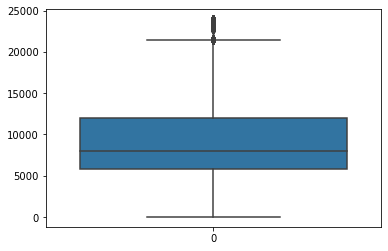

In [362]:
sns.boxplot(data=df_train['Purchase'])

In [363]:
#Define the function to identify the outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [364]:
#Fix the outliers 
columns = ['Purchase']
for column in columns:
    lr,ur=remove_outlier(df_train[column])
    df_train[column]=np.where(df_train[column]>ur,ur,df_train[column])
    df_train[column]=np.where(df_train[column]<lr,lr,df_train[column])

<AxesSubplot:>

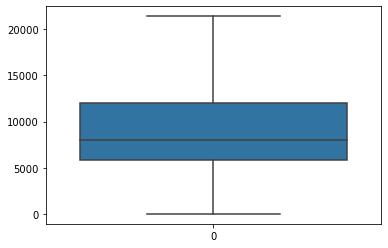

In [365]:
sns.boxplot(data=df_train['Purchase'])

In [366]:
# fig, axis=plt.subplots(nrows=3,ncols=3)
# fig.set_size_inches(15,17)
# fig.tight_layout()

# pltcol = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Product_Category_1','Product_Category_2', 'Product_Category_3','Occupation', 'Marital_Status']
# i=0
# j=0
# for col in pltcol:
#     sns.stripplot(x=col,y='Purchase',data=df_train,ax=axis[i][j],jitter=0.05)
#     if j==2:
#         j=0
#         i=i+1
#     else:
#         j=j+1

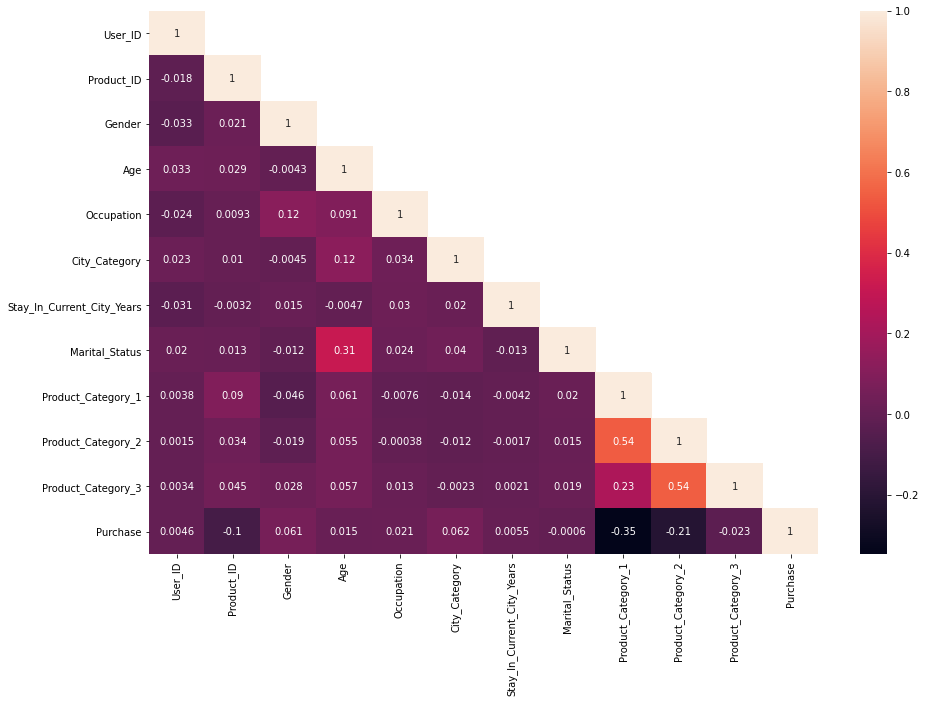

In [367]:
#Heat map - Relationalship analysis
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),annot=True,mask=np.triu(df_train.corr(),+1));

In [368]:
from sklearn.model_selection import train_test_split
X = df_train.drop('Purchase',axis=1)
y = df_train.pop('Purchase')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [369]:
from sklearn.linear_model import LinearRegression

In [370]:
lr = LinearRegression()

In [371]:
lr_model = lr.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
train_prediction = lr_model.predict(X_train)
test_prediction = lr_model.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
rmse_model3_train = metrics.mean_squared_error(y_train,train_prediction,squared=False)
print(f"RMSE : {rmse_model3_train}")

RMSE : 4586.950608822116


In [ ]:
rmse_model3_test = metrics.mean_squared_error(y_test,test_prediction,squared=False)
print(f"RMSE : {rmse_model3_test}")

RMSE : 4592.719191570081
